### データ分析例（中井）  
このノートブックでは、Kaggleの「Pokemon with stats」と言うポケモンのデータセットを使用し、データ分析を行います。
https://www.kaggle.com/datasets/abcsds/pokemon?resource=download

<img src="pika.jpeg" alt="ポケモンの画像" width="250" height="250">


第1世代〜第7世代までの合計800匹のポケモンデータが含まれています。


![Sample Image](image.png)


### ライブラリインポート

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matplotlibのスタイルを"ggplot"に設定
# これにより、グラフのデザインがggplot風（Rのggplot2ライブラリに似たスタイル）になります
plt.style.use("ggplot")

### データ読み込み


In [105]:
# Pandasの機能を使い、"Pokemon.csv"というデータをPythonコードで読み込み、Dataframeオブジェクトとして扱う
train = pd.read_csv("Pokemon.csv")

### データを見てみる

In [106]:
# head関数をつかって、先頭5行分のデータをダイジェスト表示する
train.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- #: インデックス番号
- Name: ポケモンの名前
- Type 1: ポケモンのタイプ
- Type 2: ポケモンの２つ目のタイプ（無いポケモンもいる）
- Total: 攻撃、特攻、防御、特防、素早さ、HPの合計
- HP: 体力
- Attack: 攻撃力
- Defense: 防御力
- Sp. Atk: 特殊攻撃力
- Sp. Def: 特殊防御力
- Speed: 素早さ
- Generation: 世代の番号
- Legendary: 伝説のポケモンであればTrue、そうでなければFalse

In [107]:
# また、tail関数を使えば末尾5行を確認できます
train.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


### 行数と列数を確認する

In [108]:
train.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### ポケモンの日本語名を取得する
- WikiからPythonでスクレイピングして、和訳するための辞書を作ります。

In [110]:
# requestsとBeautifulSoupをインポート
import requests
from bs4 import BeautifulSoup

# ポケモンの外国語名一覧のURLを指定
pokemon_url = "https://wiki.ポケモン.com/wiki/ポケモンの外国語名一覧"

# 指定したURLからページの内容を取得
r = requests.get(pokemon_url)

# BeautifulSoupを使って取得したページの内容をパース
soup = BeautifulSoup(r.content, "html.parser")

# 翻訳用の辞書を初期化
translator = {}

# ページの指定された部分（idが"mw-content-text"のdiv内）から全ての行（trタグ）を探す
for tr in soup.find("div", {"id": "mw-content-text"}).findAll("tr"):
    # 各行に含まれるセル（tdタグ）が3つ以上あるか確認
    if len(tr.findAll("td")) > 2:
        # 外国語名をキー、日本語名を値として辞書に追加
        # 各セルのテキストを取得し、前後の空白を除去し、適切な形式に変換
        translator[tr.findAll("td")[2].getText().strip().lower()] = tr.findAll("td")[1].getText().strip()

# 完成した辞書を表示
translator

{'bulbasaur': 'フシギダネ',
 'ivysaur': 'フシギソウ',
 'venusaur': 'フシギバナ',
 'charmander': 'ヒトカゲ',
 'charmeleon': 'リザード',
 'charizard': 'リザードン',
 'squirtle': 'ゼニガメ',
 'wartortle': 'カメール',
 'blastoise': 'カメックス',
 'caterpie': 'キャタピー',
 'metapod': 'トランセル',
 'butterfree': 'バタフリー',
 'weedle': 'ビードル',
 'kakuna': 'コクーン',
 'beedrill': 'スピアー',
 'pidgey': 'ポッポ',
 'pidgeotto': 'ピジョン',
 'pidgeot': 'ピジョット',
 'rattata': 'コラッタ',
 'raticate': 'ラッタ',
 'spearow': 'オニスズメ',
 'fearow': 'オニドリル',
 'ekans': 'アーボ',
 'arbok': 'アーボック',
 'pikachu': 'ピカチュウ',
 'raichu': 'ライチュウ',
 'sandshrew': 'サンド',
 'sandslash': 'サンドパン',
 'nidoran♀': 'ニドラン♀',
 'nidorina': 'ニドリーナ',
 'nidoqueen': 'ニドクイン',
 'nidoran♂': 'ニドラン♂',
 'nidorino': 'ニドリーノ',
 'nidoking': 'ニドキング',
 'clefairy': 'ピッピ',
 'clefable': 'ピクシー',
 'vulpix': 'ロコン',
 'ninetales': 'キュウコン',
 'jigglypuff': 'プリン',
 'wigglytuff': 'プクリン',
 'zubat': 'ズバット',
 'golbat': 'ゴルバット',
 'oddish': 'ナゾノクサ',
 'gloom': 'クサイハナ',
 'vileplume': 'ラフレシア',
 'paras': 'パラス',
 'parasect': 'パラセクト',
 'venonat':

### データフレームにポケモンの日本語名を追加

In [111]:
# trainデータフレームに新しい列"Japanese_Name"を追加
# "Name"列の各値に対して、translator辞書を使用して対応する日本語名を取得
# apply()メソッドを使って各要素に関数を適用
# lambda関数を使用して、各名前を小文字に変換し、translator辞書から対応する日本語名を取得
# .get()メソッドを使って、対応する日本語名が見つからない場合にはNoneを返す
train["Japanese_Name"] = train["Name"].apply(lambda x: translator.get(x.lower()))

# 結果のデータフレームtrainを表示
train

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Japanese_Name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,フシギダネ
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,フシギソウ
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,フシギバナ
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,None
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,ヒトカゲ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,ディアンシー
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,None
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,None
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,None


### Japanese_NameがNoneのポケモン ＝ メガ進化ポケモン →外れ値として、今回の分析からは排除する
- 対応する日本語名が存在しないポケモンがいる。
- そのポケモンを見てみると、メガ進化したポケモンだと分かる
- メガ進化は特殊な状態であるため、外れ値として除外することとする

In [112]:
# "Japanese_Name"列がnullでない行のみを含む新しいデータフレームtrain2を作成
# train["Japanese_Name"].isnull()は"Japanese_Name"列の各値がnullかどうかを示すブール値のシリーズを返す
# == Falseはnullでない行を選択するための条件を指定
# train[...]で条件に一致する行をフィルタリングして新しいデータフレームtrain2を作成
train2 = train[train["Japanese_Name"].isnull() == False]

# train2データフレームの統計的な概要を表示
# describe()メソッドは数値データの要約統計量（平均、標準偏差、最小値、四分位数、最大値など）を表示
train2.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,355.329078,415.035461,68.032624,74.536170,70.449645,68.075177,68.801418,65.140426,3.283688
std,206.538516,108.431745,25.761258,28.770776,29.265547,28.227088,26.813121,27.027162,1.662275
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,177.000000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,353.000000,420.000000,65.000000,73.000000,65.000000,65.000000,65.000000,64.000000,3.000000
75%,533.000000,495.000000,80.000000,94.000000,85.000000,87.000000,85.000000,85.000000,5.000000
max,721.000000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000


メガ進化ポケモン除外前と比較すると、もともと標準偏差が大きめだった攻撃、防御、特殊攻撃がかなり下がっている。

- メガ進化を使うと、これらの値が飛躍的にアップしていたと推定できる。

### 各カラムの相関係数をヒートマップで確認
- 色の濃淡によって相関の強さが一発で見えるようになるので、データの全体像を眺めるときに便利

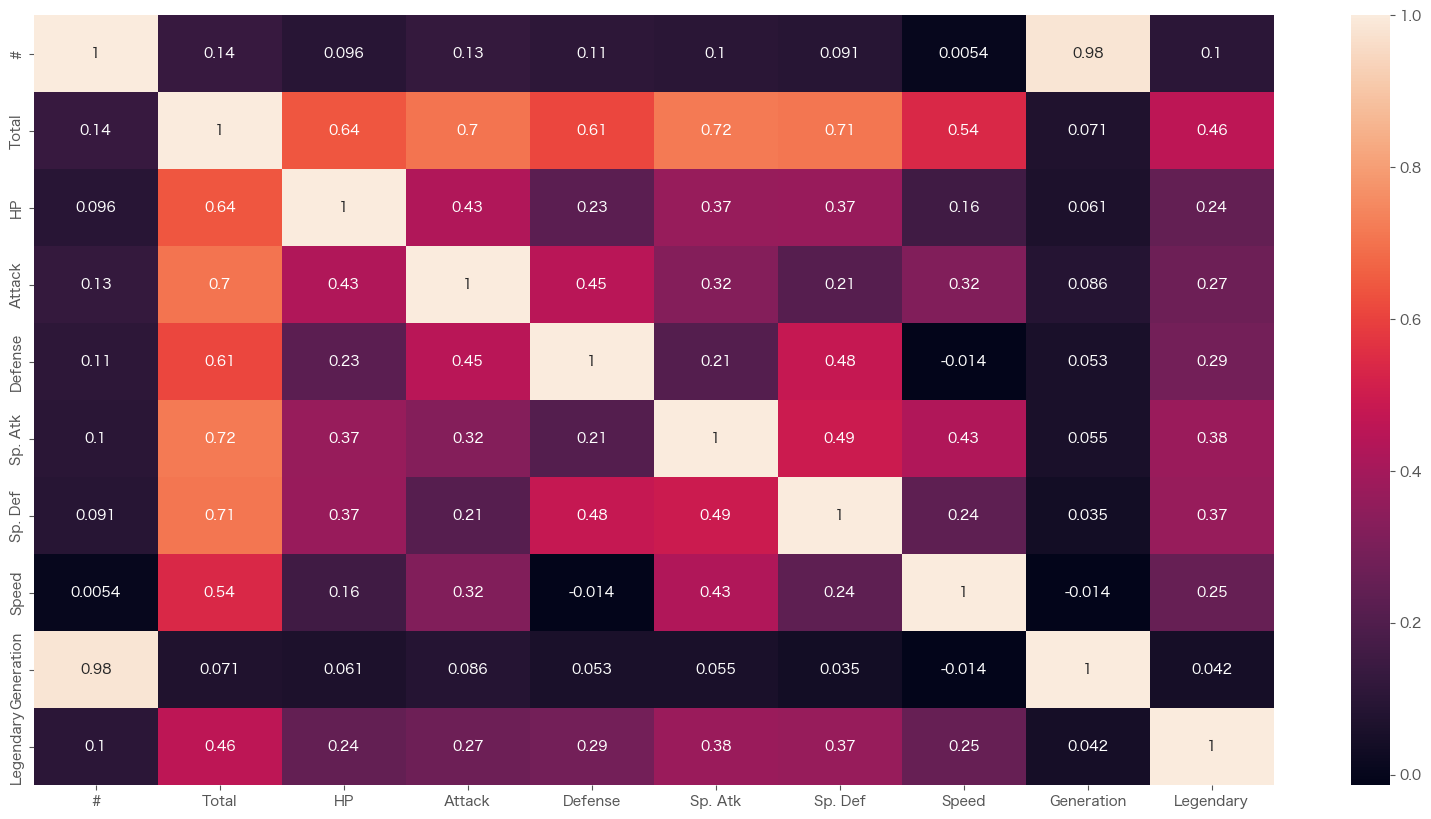

In [113]:
# pandasライブラリをpd、matplotlib.pyplotをplt、seabornをsnsとしてインポート（前提）
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train2データフレームから数値型（float, int, bool）の列のみを選択し、numeric_dfに格納
# select_dtypes()メソッドを使用して、指定されたデータ型を含む列を抽出
numeric_df = train2.select_dtypes(include=[float, int, bool])

# 図のサイズを20x10インチに設定して新しい図を作成
fig = plt.figure(figsize=(20, 10))

# 数値データの相関行列をヒートマップで表示
# corr()メソッドを使用して、数値データの相関行列を計算
# sns.heatmap()関数を使用してヒートマップを作成、annot=Trueは各セルに相関係数の値を表示
sns.heatmap(numeric_df.corr(), annot=True)

# 作成したヒートマップを表示
plt.show()

【Total（合計）との相関】
- 特にSp. Atk（相関係数: 0.72）と高い相関を持っている

【Generation（世代）との相関】
- Generationはほとんどのステータスとの相関が低く、世代が変わることで個々のステータスが大きく変わるわけではないことが示唆されている

### 各能力値のヒストグラムを確認

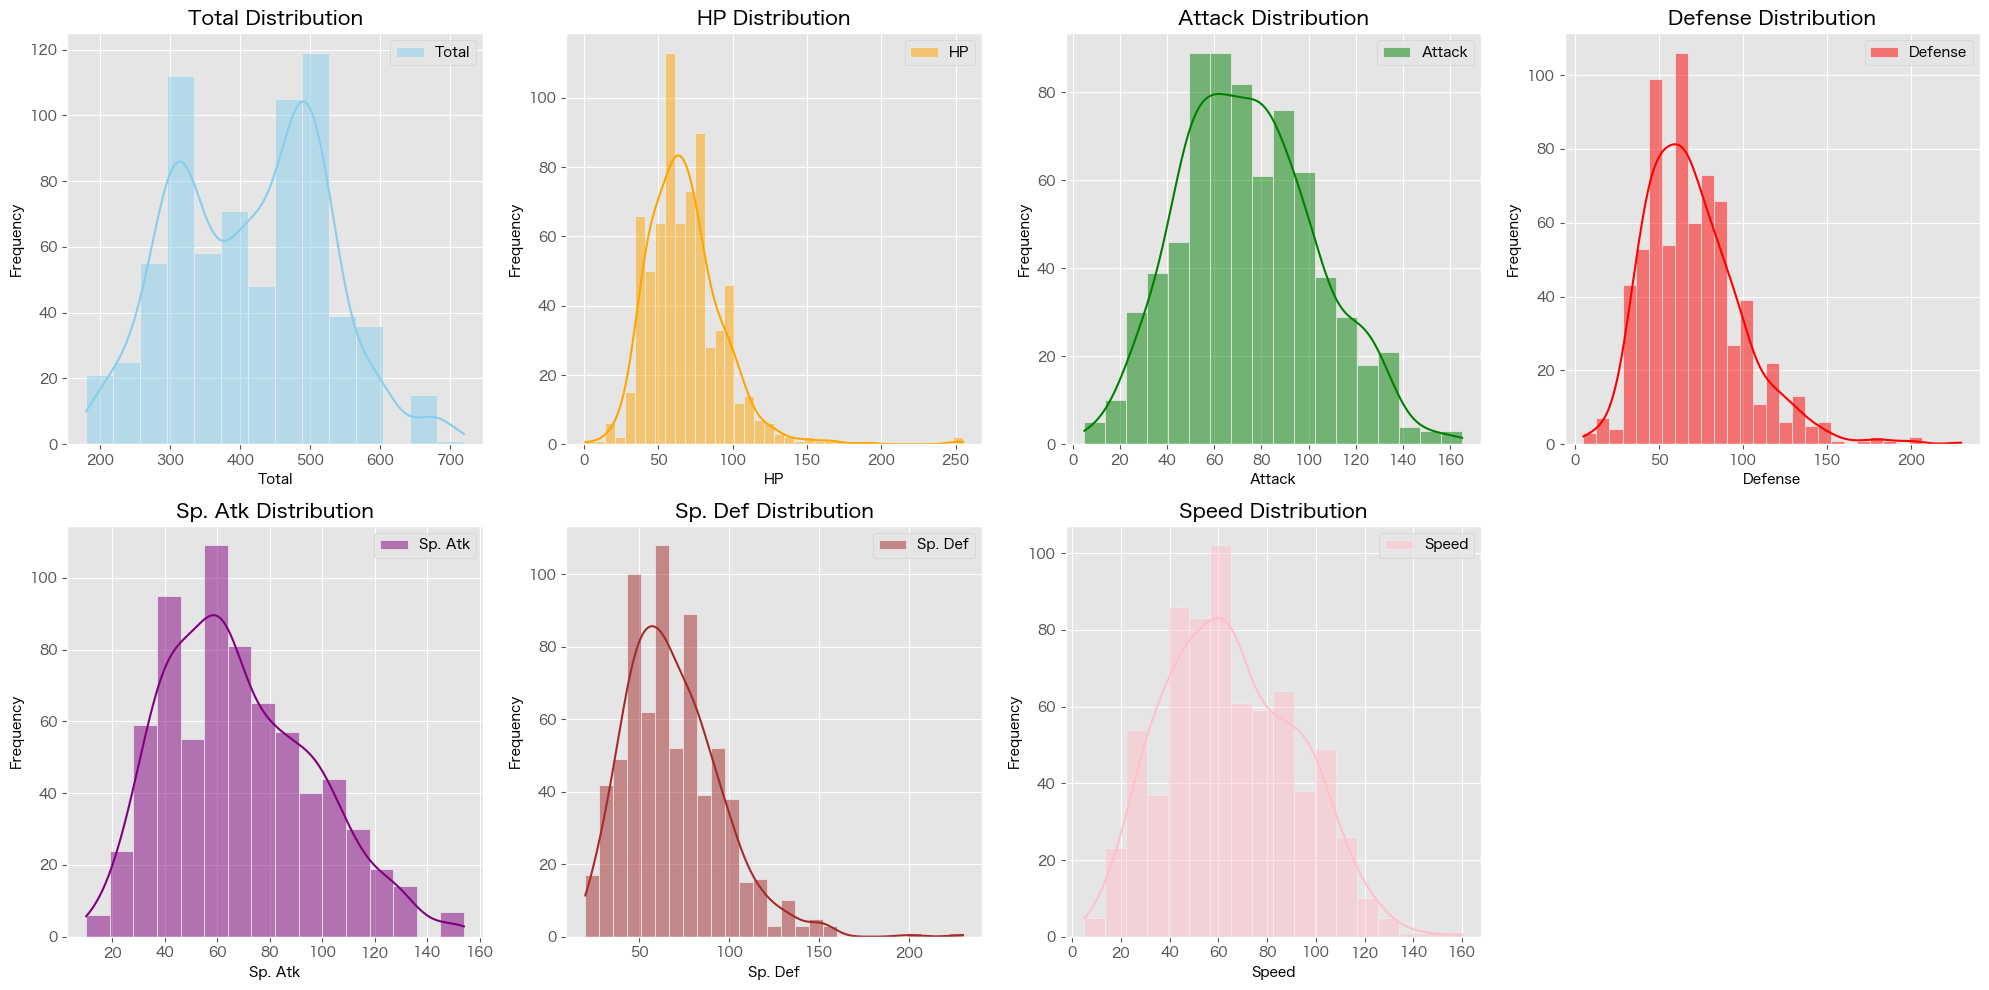

/var/folders/fg/bn39687n60j3gfcb96jghj340000gn/T/ipykernel_77224/1371391770.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2.replace([np.inf, -np.inf], np.nan, inplace=True)


In [114]:
import warnings

# FutureWarningを無視する
warnings.simplefilter(action='ignore', category=FutureWarning)

# 全体の図のサイズを設定
plt.figure(figsize=(20, 10))

# "Total"のヒストグラムとカーネル密度推定プロット
plt.subplot(2, 4, 1)
sns.histplot(train2["Total"], kde=True, label="Total", color="skyblue")
plt.title("Total Distribution")
plt.xlabel("Total")
plt.ylabel("Frequency")
plt.legend()

# "HP"のヒストグラムとカーネル密度推定プロット
plt.subplot(2, 4, 2)
sns.histplot(train2["HP"], kde=True, label="HP", color="orange")
plt.title("HP Distribution")
plt.xlabel("HP")
plt.ylabel("Frequency")
plt.legend()

# "Attack"のヒストグラムとカーネル密度推定プロット
plt.subplot(2, 4, 3)
sns.histplot(train2["Attack"], kde=True, label="Attack", color="green")
plt.title("Attack Distribution")
plt.xlabel("Attack")
plt.ylabel("Frequency")
plt.legend()

# "Defense"のヒストグラムとカーネル密度推定プロット
plt.subplot(2, 4, 4)
sns.histplot(train2["Defense"], kde=True, label="Defense", color="red")
plt.title("Defense Distribution")
plt.xlabel("Defense")
plt.ylabel("Frequency")
plt.legend()

# "Sp. Atk"のヒストグラムとカーネル密度推定プロット
plt.subplot(2, 4, 5)
sns.histplot(train2["Sp. Atk"], kde=True, label="Sp. Atk", color="purple")
plt.title("Sp. Atk Distribution")
plt.xlabel("Sp. Atk")
plt.ylabel("Frequency")
plt.legend()

# "Sp. Def"のヒストグラムとカーネル密度推定プロット
plt.subplot(2, 4, 6)
sns.histplot(train2["Sp. Def"], kde=True, label="Sp. Def", color="brown")
plt.title("Sp. Def Distribution")
plt.xlabel("Sp. Def")
plt.ylabel("Frequency")
plt.legend()

# "Speed"のヒストグラムとカーネル密度推定プロット
plt.subplot(2, 4, 7)
sns.histplot(train2["Speed"], kde=True, label="Speed", color="pink")
plt.title("Speed Distribution")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.legend()

# レイアウトの調整
plt.tight_layout()
plt.show()

train2.replace([np.inf, -np.inf], np.nan, inplace=True)

【Total】
- ポケモンの合計ステータス（Total）は、300〜500の範囲に多く分布しています。
- 一部に600以上の高い値を持つポケモンもいますが、これは少数です。

【HP】
- HPの分布は50〜100の範囲に集中しています。特に70前後にピークがあります。
- 高いHPを持つポケモンもいますが、200を超えるのは非常に稀です。

【Attack Distribution】
- 攻撃力（Attack）は50〜100の範囲に多く分布しています。80前後が最も多いです。
- 160以上の攻撃力を持つポケモンは非常に少ないです。

【Defense Distribution】
- 防御力（Defense）は50〜100の範囲に多く分布しています。50〜60の間にピークがあります。
- 高い防御力を持つポケモンも存在しますが、150を超えるのは稀です。

【Sp. Atk Distribution】
- 特攻（Sp. Atk）は40〜80の範囲に多く分布しています。50前後が最も多いです。
- 120以上の特攻を持つポケモンは少ないです。

【Sp. Def Distribution】
- 特防（Sp. Def）は50〜80の範囲に多く分布しています。60前後が最も多いです。
- 150を超える特防を持つポケモンは非常に少ないです。

【Speed Distribution】
- 素早さ（Speed）は50〜100の範囲に多く分布しています。60前後が最も多いです。
- 140以上の素早さを持つポケモンは非常に少ないです。

### 能力値以外のデータについて確認

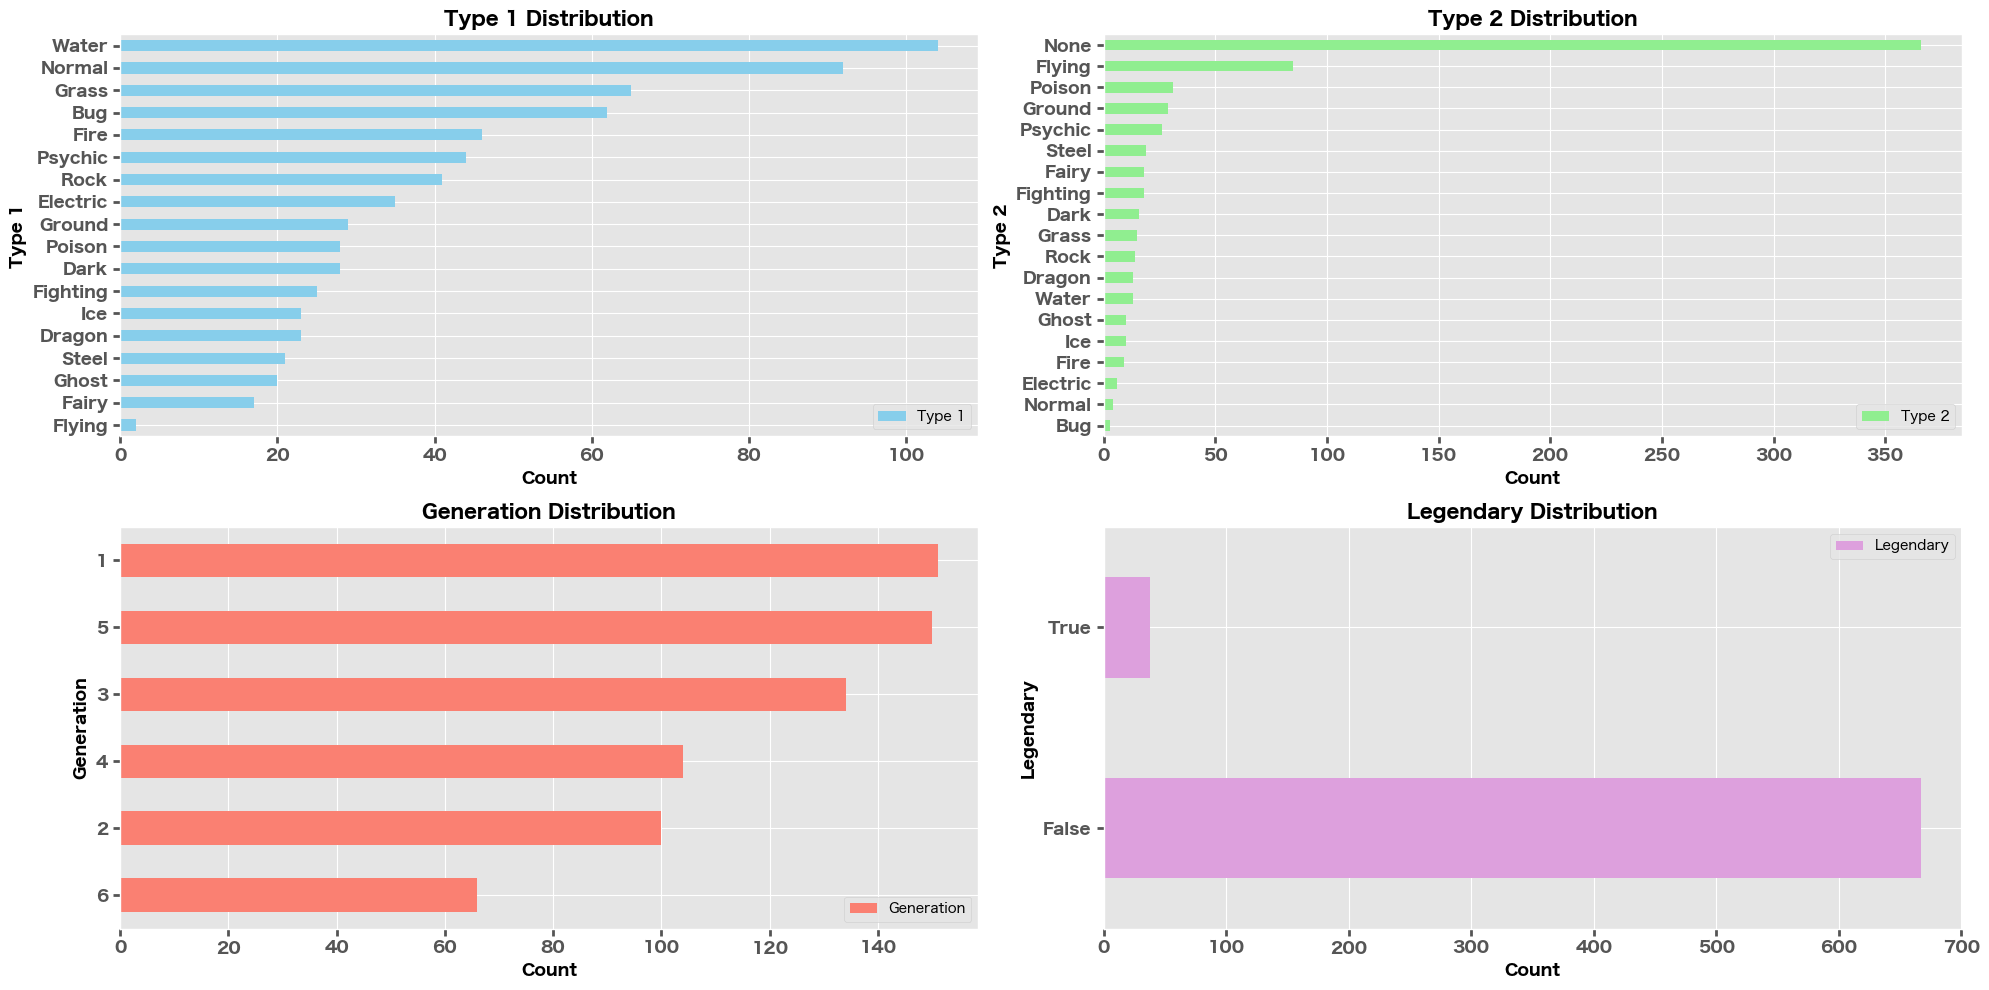

In [115]:
import matplotlib.pyplot as plt

# プロットの全体サイズを設定（幅20インチ、高さ10インチ）
plt.figure(figsize=(20,10))

# プロットの1つ目を作成（2行2列のサブプロットの1番目）
plt.subplot(2,2,1)
# "Type 1"列の値のカウントを取得し、ソートして横棒グラフとしてプロット
train2["Type 1"].value_counts().sort_values().plot(kind="barh", color="skyblue")
# タイトルと軸ラベルを設定
plt.title("Type 1 Distribution", fontweight='bold', fontsize=14)
plt.xlabel("Count", fontweight='bold', fontsize=12)
plt.ylabel("Type 1", fontweight='bold', fontsize=12)
# 凡例を表示
plt.legend(["Type 1"], loc="best")

# プロットの2つ目を作成（2行2列のサブプロットの2番目）
plt.subplot(2,2,2)
# 欠損値を"None"で埋めた"Type 2"列の値のカウントを取得し、ソートして横棒グラフとしてプロット
train2.fillna("None")["Type 2"].value_counts().sort_values().plot(kind="barh", color="lightgreen")
# タイトルと軸ラベルを設定
plt.title("Type 2 Distribution", fontweight='bold', fontsize=14)
plt.xlabel("Count", fontweight='bold', fontsize=12)
plt.ylabel("Type 2", fontweight='bold', fontsize=12)
# 凡例を表示
plt.legend(["Type 2"], loc="best")

# プロットの3つ目を作成（2行2列のサブプロットの3番目）
plt.subplot(2,2,3)
# "Generation"列の値のカウントを取得し、ソートして横棒グラフとしてプロット
train2["Generation"].value_counts().sort_values().plot(kind="barh", color="salmon")
# タイトルと軸ラベルを設定
plt.title("Generation Distribution", fontweight='bold', fontsize=14)
plt.xlabel("Count", fontweight='bold', fontsize=12)
plt.ylabel("Generation", fontweight='bold', fontsize=12)
# 凡例を表示
plt.legend(["Generation"], loc="best")

# プロットの4つ目を作成（2行2列のサブプロットの4番目）
plt.subplot(2,2,4)
# "Legendary"列の値のカウントを取得し、横棒グラフとしてプロット
train2["Legendary"].value_counts().plot(kind="barh", color="plum")
# タイトルと軸ラベルを設定
plt.title("Legendary Distribution", fontweight='bold', fontsize=14)
plt.xlabel("Count", fontweight='bold', fontsize=12)
plt.ylabel("Legendary", fontweight='bold', fontsize=12)
# 凡例を表示
plt.legend(["Legendary"], loc="best")

# 全てのプロットに対して目盛りラベルのスタイルを設定
for ax in plt.gcf().get_axes():
    # x軸の目盛りラベルを設定
    ax.tick_params(axis='x', labelsize=12, labelrotation=0, width=2, length=5)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    
    # y軸の目盛りラベルを設定
    ax.tick_params(axis='y', labelsize=12, labelrotation=0, width=2, length=5)
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

# レイアウトの調整
plt.tight_layout()
plt.show()

【Type1】
- 水タイプとノーマルタイプが多い（水タイプ100匹以上）
- ひこうタイプがやたらと少ない

【Type2】
- 2個目のタイプを持っていないポケモンが圧倒的に多い(350匹以上)
- 持っている場合だと、ひこうタイプが圧倒的に多い（90匹）

【Type3】
- 第6世代のみ少ない

### 箱ひげ図で各タイプごとにデータを確認

<Axes: xlabel='Type 2', ylabel='Total'>

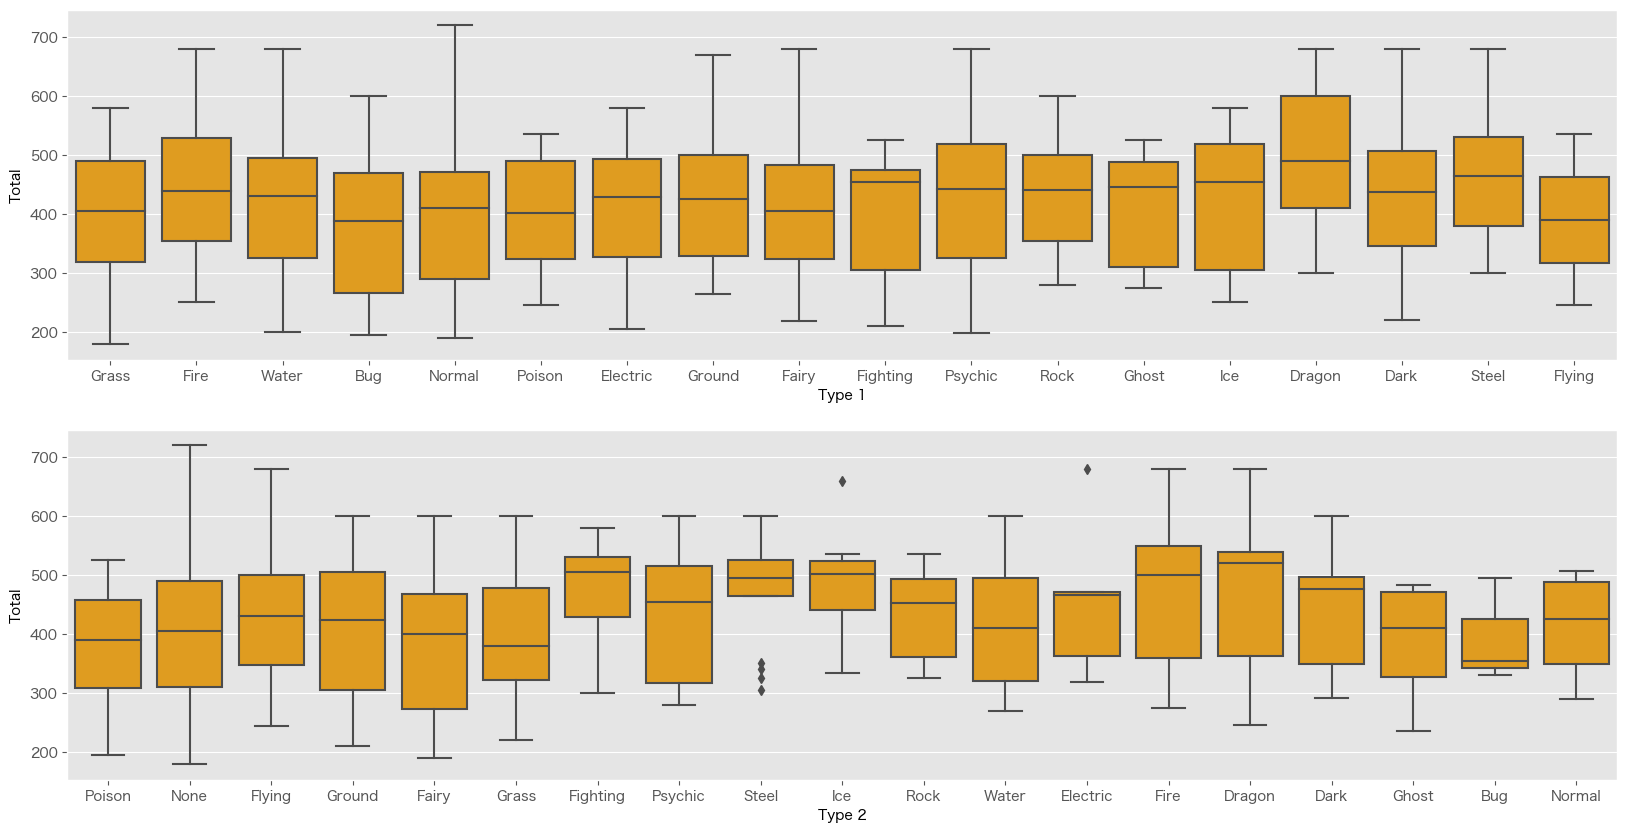

In [116]:
# プロットの全体サイズを設定します（幅20インチ、高さ10インチ）
plt.figure(figsize=(20,10))

# プロットの1つ目を作成（2行1列のサブプロットの1番目）
plt.subplot(2,1,1)
# Seabornのボックスプロットを使用して、"Type 1"別に"Total"の分布を表示します
# データはtrain2から取得し、プロットの色をオレンジに設定します
sns.boxplot(data=train2, y="Total", x="Type 1", color="orange")

# プロットの2つ目を作成（2行1列のサブプロットの2番目）
plt.subplot(2,1,2)
# 欠損値を"None"で埋めたデータを使用し、"Type 2"別に"Total"の分布を表示します
# データはtrain2から取得し、プロットの色をオレンジに設定します
sns.boxplot(data=train2.fillna("None"), y="Total", x="Type 2", color="orange")


【Type1】
- Dragonタイプ：中央値と四分位範囲が高く、強力なポケモンが多いです。合計ステータスのばらつきが大きく、強力な伝説のポケモンも含まれていることが考えられる。
- Bug(虫)タイプ：中央値が低く、四分位範囲も狭いため、ステータスが低い傾向にある。





### Type1ごとの平均値を確認

In [117]:
# 数値型の列のみを選択する
numeric_cols = train2.select_dtypes(include='number')

# 数値型のデータフレームに 'Type 1' を追加（グループ化のため）
df_numeric = train2[['Type 1']].join(numeric_cols)

# グループ化と平均値の計算
result = df_numeric.groupby("Type 1").mean().sort_values(by="Total", ascending=False)

result

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Type 1,,,,,,,,,
Dragon,472.739130,497.695652,76.739130,102.739130,77.304348,82.521739,82.521739,75.869565,3.869565
Steel,447.714286,462.285714,65.047619,85.142857,117.952381,64.190476,76.047619,53.904762,3.857143
Fire,333.108696,442.217391,67.804348,80.956522,65.108696,84.630435,69.782609,73.934783,3.239130
Rock,394.414634,437.804878,64.536585,88.463415,99.756098,60.048780,73.073171,51.926829,3.487805
Psychic,369.181818,434.795455,70.795455,58.454545,65.250000,88.068182,82.068182,70.159091,3.340909
Dark,479.000000,434.750000,67.178571,86.250000,67.928571,70.500000,67.500000,75.392857,4.178571
Ice,426.217391,427.086957,71.652174,70.695652,71.043478,75.695652,76.130435,61.869565,3.565217
Electric,337.828571,416.142857,58.942857,66.428571,58.771429,81.885714,67.371429,82.742857,3.114286
Water,302.615385,415.634615,70.673077,71.038462,70.298077,71.163462,67.865385,64.596154,2.865385


- Totalで見るとドラゴンタイプが最強
- 一番弱いのはむしタイプ

### 伝説のポケモンとそれ以外で比較

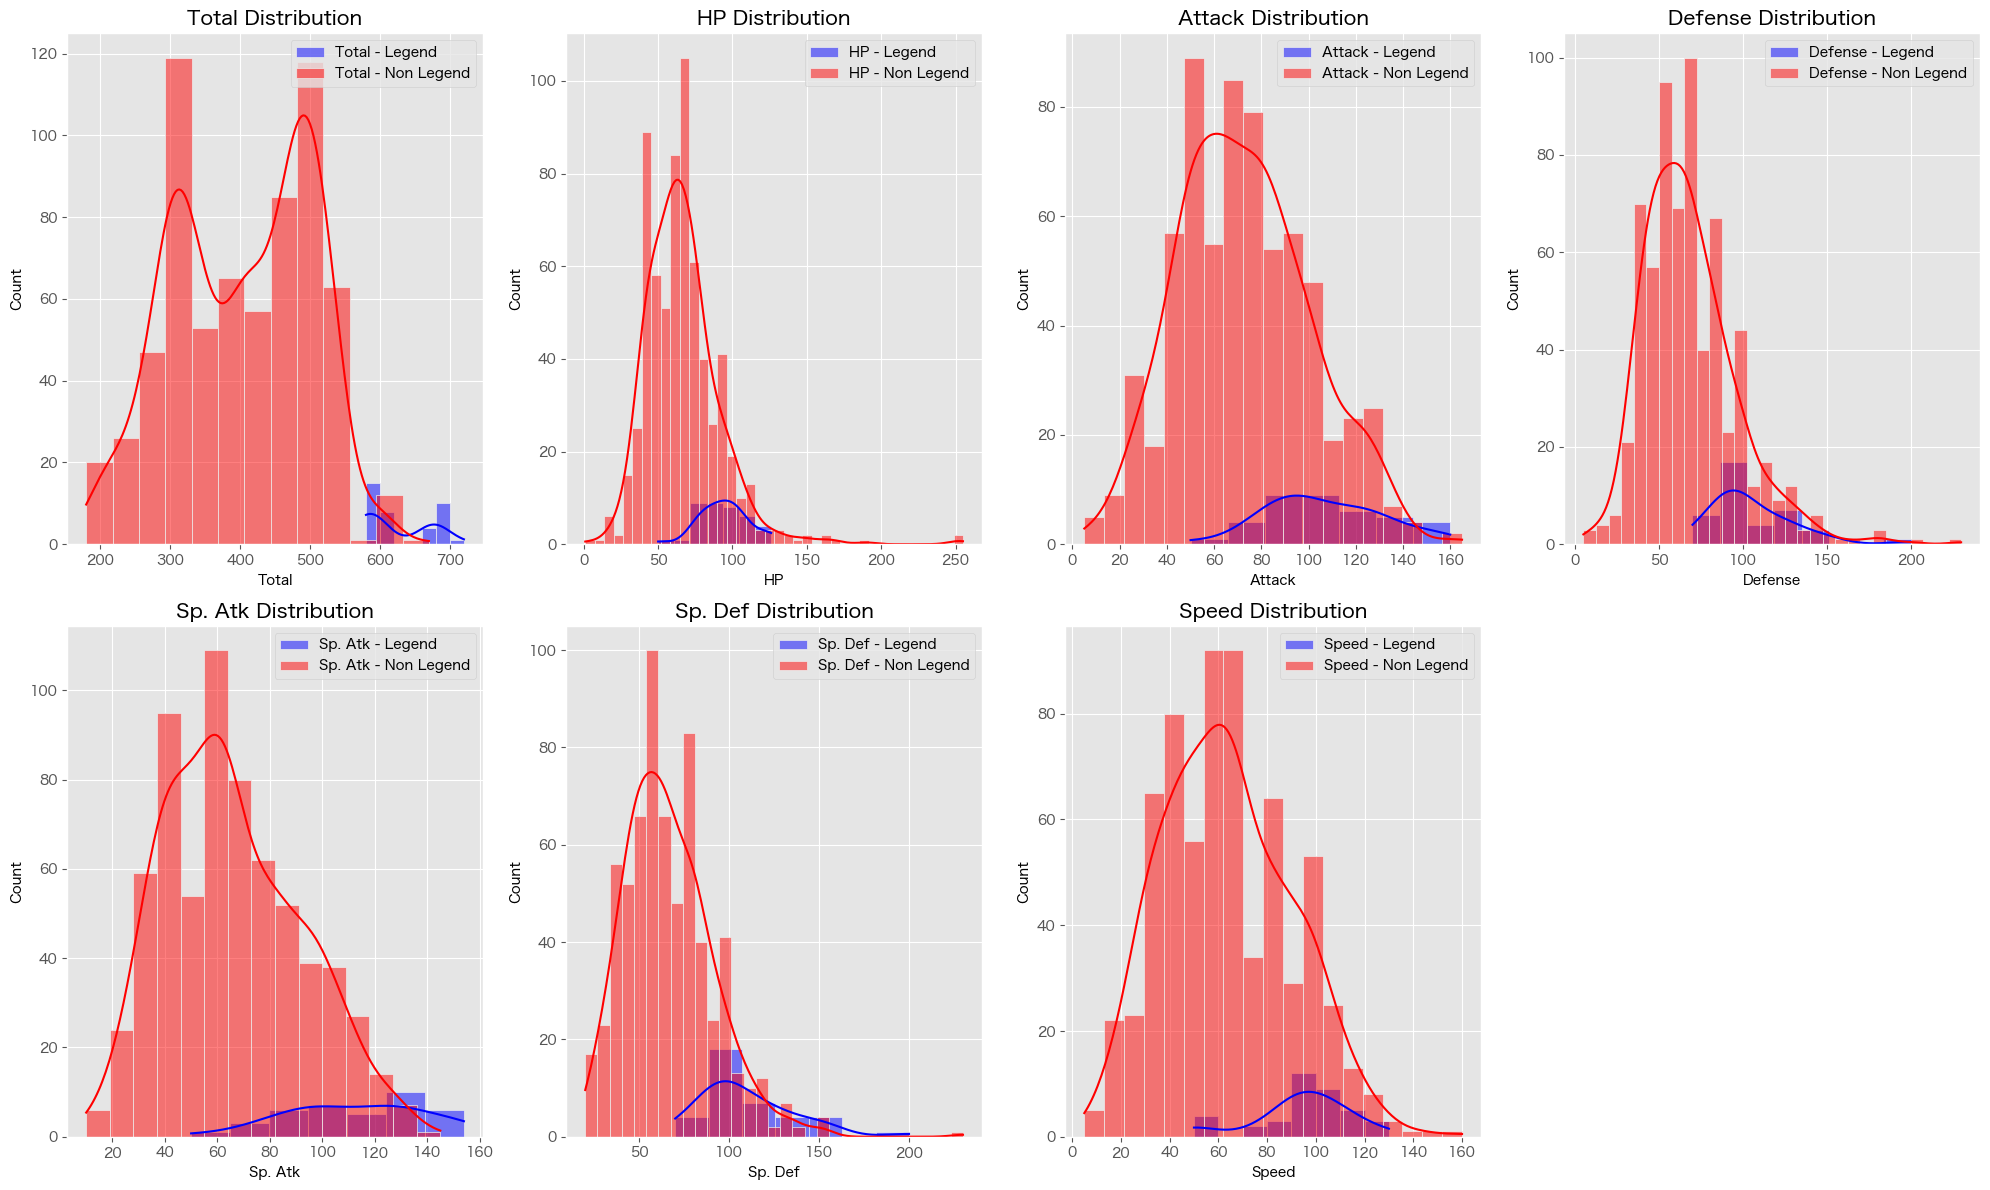

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# FutureWarningを無視する
warnings.simplefilter(action='ignore', category=FutureWarning)

# データフレーム全体の無限大の値をNaNに変換
train2 = train2.replace([np.inf, -np.inf], np.nan)

# グラフのサイズを設定
plt.figure(figsize=(20, 12))

# Totalの分布
plt.subplot(2, 4, 1)
sns.histplot(train2[train2["Legendary"] == 1]["Total"], kde=True, label="Total - Legend", color='blue')
sns.histplot(train2[train2["Legendary"] == 0]["Total"], kde=True, label="Total - Non Legend", color='red')
plt.title("Total Distribution")
plt.legend()

# HPの分布
plt.subplot(2, 4, 2)
sns.histplot(train2[train2["Legendary"] == 1]["HP"], kde=True, label="HP - Legend", color='blue')
sns.histplot(train2[train2["Legendary"] == 0]["HP"], kde=True, label="HP - Non Legend", color='red')
plt.title("HP Distribution")
plt.legend()

# Attackの分布
plt.subplot(2, 4, 3)
sns.histplot(train2[train2["Legendary"] == 1]["Attack"], kde=True, label="Attack - Legend", color='blue')
sns.histplot(train2[train2["Legendary"] == 0]["Attack"], kde=True, label="Attack - Non Legend", color='red')
plt.title("Attack Distribution")
plt.legend()

# Defenseの分布
plt.subplot(2, 4, 4)
sns.histplot(train2[train2["Legendary"] == 1]["Defense"], kde=True, label="Defense - Legend", color='blue')
sns.histplot(train2[train2["Legendary"] == 0]["Defense"], kde=True, label="Defense - Non Legend", color='red')
plt.title("Defense Distribution")
plt.legend()

# Sp. Atkの分布
plt.subplot(2, 4, 5)
sns.histplot(train2[train2["Legendary"] == 1]["Sp. Atk"], kde=True, label="Sp. Atk - Legend", color='blue')
sns.histplot(train2[train2["Legendary"] == 0]["Sp. Atk"], kde=True, label="Sp. Atk - Non Legend", color='red')
plt.title("Sp. Atk Distribution")
plt.legend()

# Sp. Defの分布
plt.subplot(2, 4, 6)
sns.histplot(train2[train2["Legendary"] == 1]["Sp. Def"], kde=True, label="Sp. Def - Legend", color='blue')
sns.histplot(train2[train2["Legendary"] == 0]["Sp. Def"], kde=True, label="Sp. Def - Non Legend", color='red')
plt.title("Sp. Def Distribution")
plt.legend()

# Speedの分布
plt.subplot(2, 4, 7)
sns.histplot(train2[train2["Legendary"] == 1]["Speed"], kde=True, label="Speed - Legend", color='blue')
sns.histplot(train2[train2["Legendary"] == 0]["Speed"], kde=True, label="Speed - Non Legend", color='red')
plt.title("Speed Distribution")
plt.legend()

# レイアウトの調整
plt.tight_layout()
plt.show()



- Totalでみると、伝説ポケモンは圧倒的に強い

### 各能力値ごとの最強ポケモン

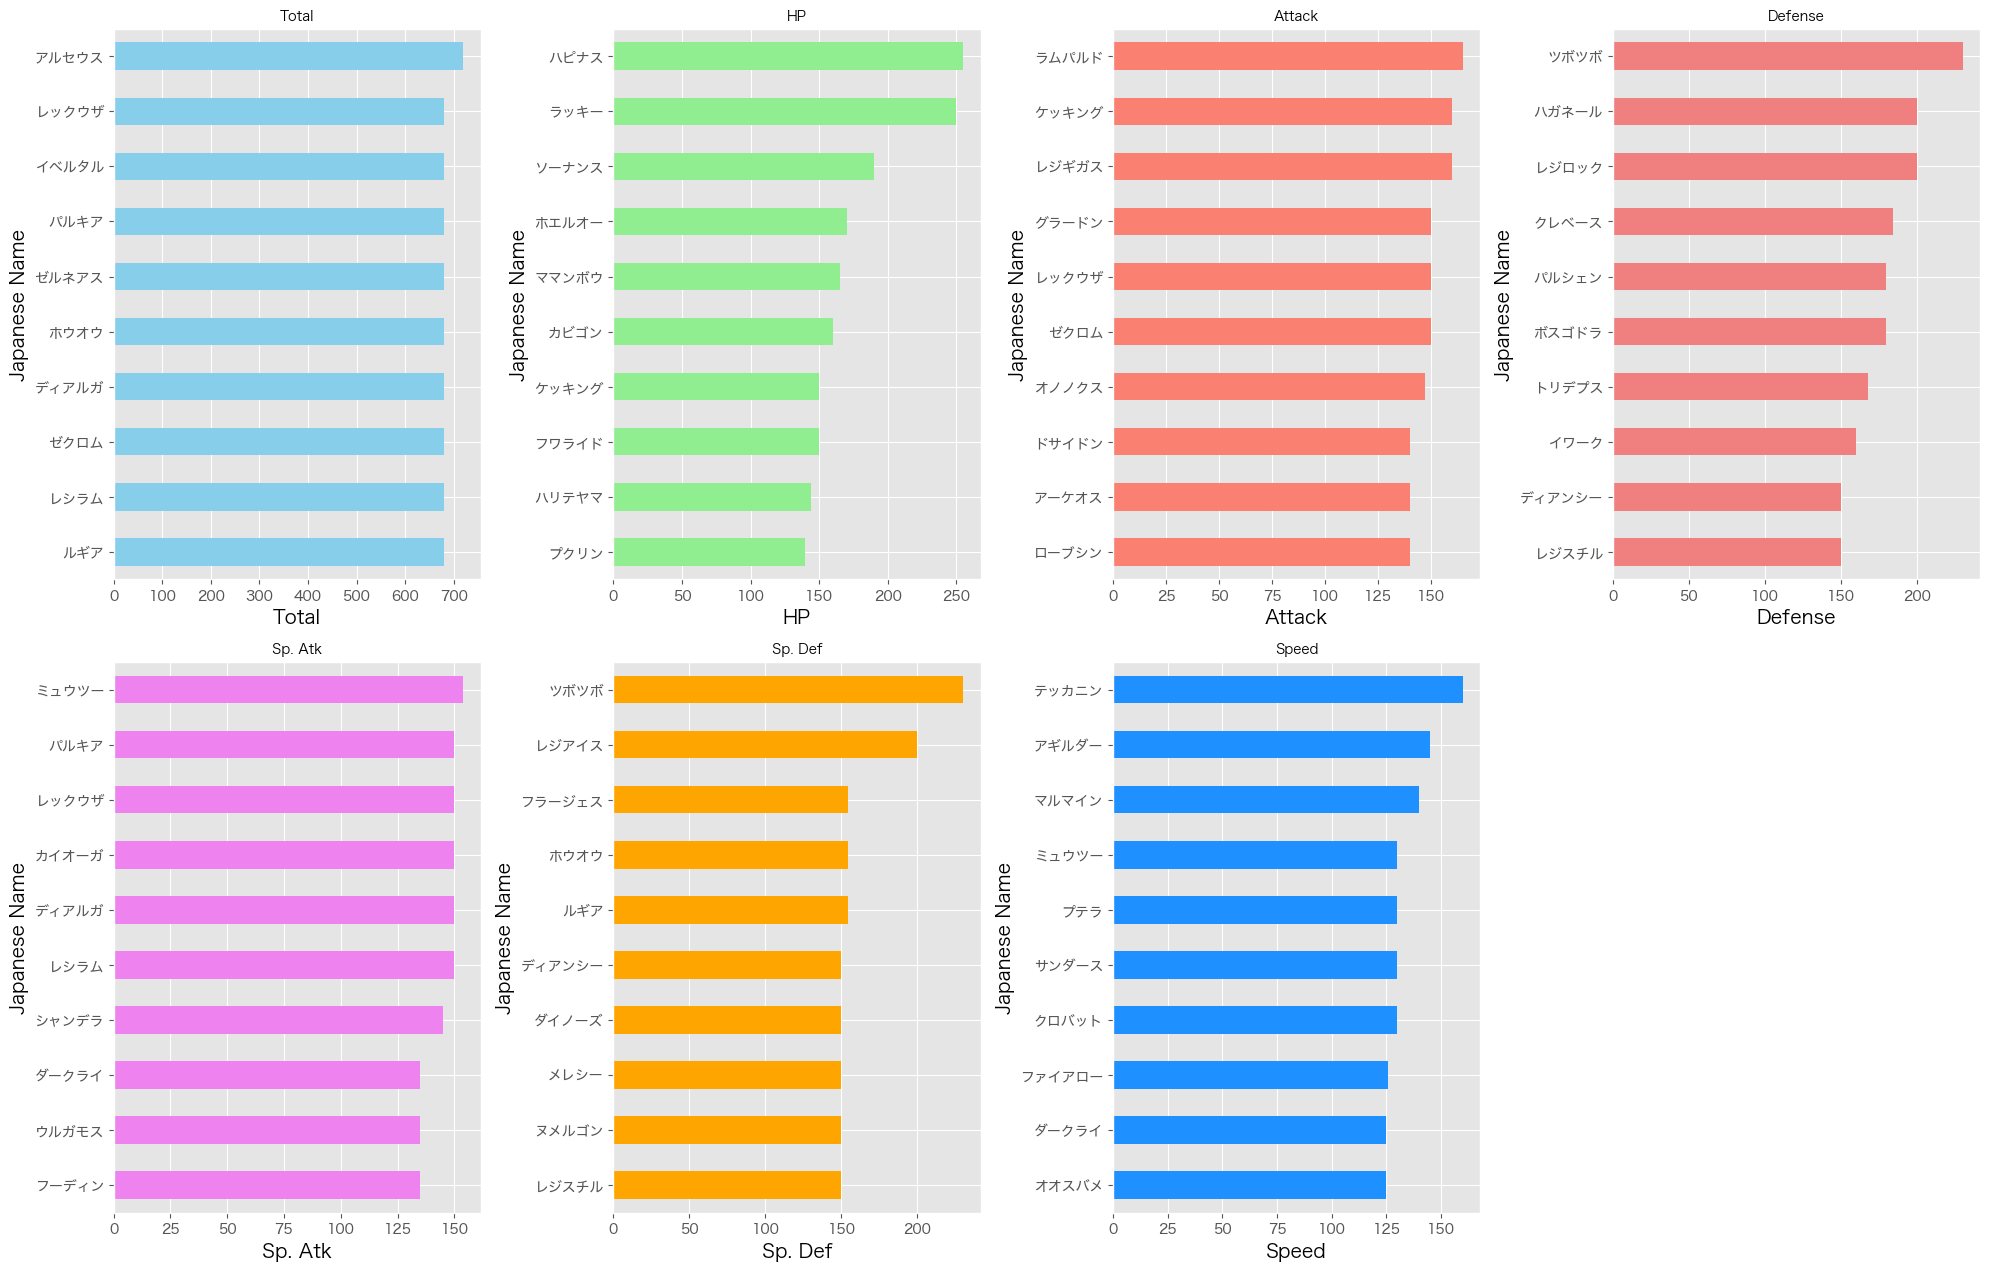

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 日本語フォントを設定
font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc'  # MacのHiraginoフォントの例
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# グラフの全体サイズを設定
plt.figure(figsize=(20, 25))

# Totalの分布
plt.subplot(4, 4, 1)
train2.sort_values(by="Total", ascending=False).head(10).set_index("Japanese_Name")["Total"].sort_values().plot(kind="barh", color='skyblue')
plt.title("Total", fontsize=16, fontproperties=font_prop)
plt.xlabel("Total", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# HPの分布
plt.subplot(4, 4, 2)
train2.sort_values(by="HP", ascending=False).head(10).set_index("Japanese_Name")["HP"].sort_values().plot(kind="barh", color='lightgreen')
plt.title("HP", fontsize=16, fontproperties=font_prop)
plt.xlabel("HP", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Attackの分布
plt.subplot(4, 4, 3)
train2.sort_values(by="Attack", ascending=False).head(10).set_index("Japanese_Name")["Attack"].sort_values().plot(kind="barh", color='salmon')
plt.title("Attack", fontsize=16, fontproperties=font_prop)
plt.xlabel("Attack", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Defenseの分布
plt.subplot(4, 4, 4)
train2.sort_values(by="Defense", ascending=False).head(10).set_index("Japanese_Name")["Defense"].sort_values().plot(kind="barh", color='lightcoral')
plt.title("Defense", fontsize=16, fontproperties=font_prop)
plt.xlabel("Defense", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Sp. Atkの分布
plt.subplot(4, 4, 5)
train2.sort_values(by="Sp. Atk", ascending=False).head(10).set_index("Japanese_Name")["Sp. Atk"].sort_values().plot(kind="barh", color='violet')
plt.title("Sp. Atk", fontsize=16, fontproperties=font_prop)
plt.xlabel("Sp. Atk", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Sp. Defの分布
plt.subplot(4, 4, 6)
train2.sort_values(by="Sp. Def", ascending=False).head(10).set_index("Japanese_Name")["Sp. Def"].sort_values().plot(kind="barh", color='orange')
plt.title("Sp. Def", fontsize=16, fontproperties=font_prop)
plt.xlabel("Sp. Def", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Speedの分布
plt.subplot(4, 4, 7)
train2.sort_values(by="Speed", ascending=False).head(10).set_index("Japanese_Name")["Speed"].sort_values().plot(kind="barh", color='dodgerblue')
plt.title("Speed", fontsize=16, fontproperties=font_prop)
plt.xlabel("Speed", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# レイアウトの調整
plt.tight_layout()
plt.show()

- ほぼ伝説のポケモンで支配されている

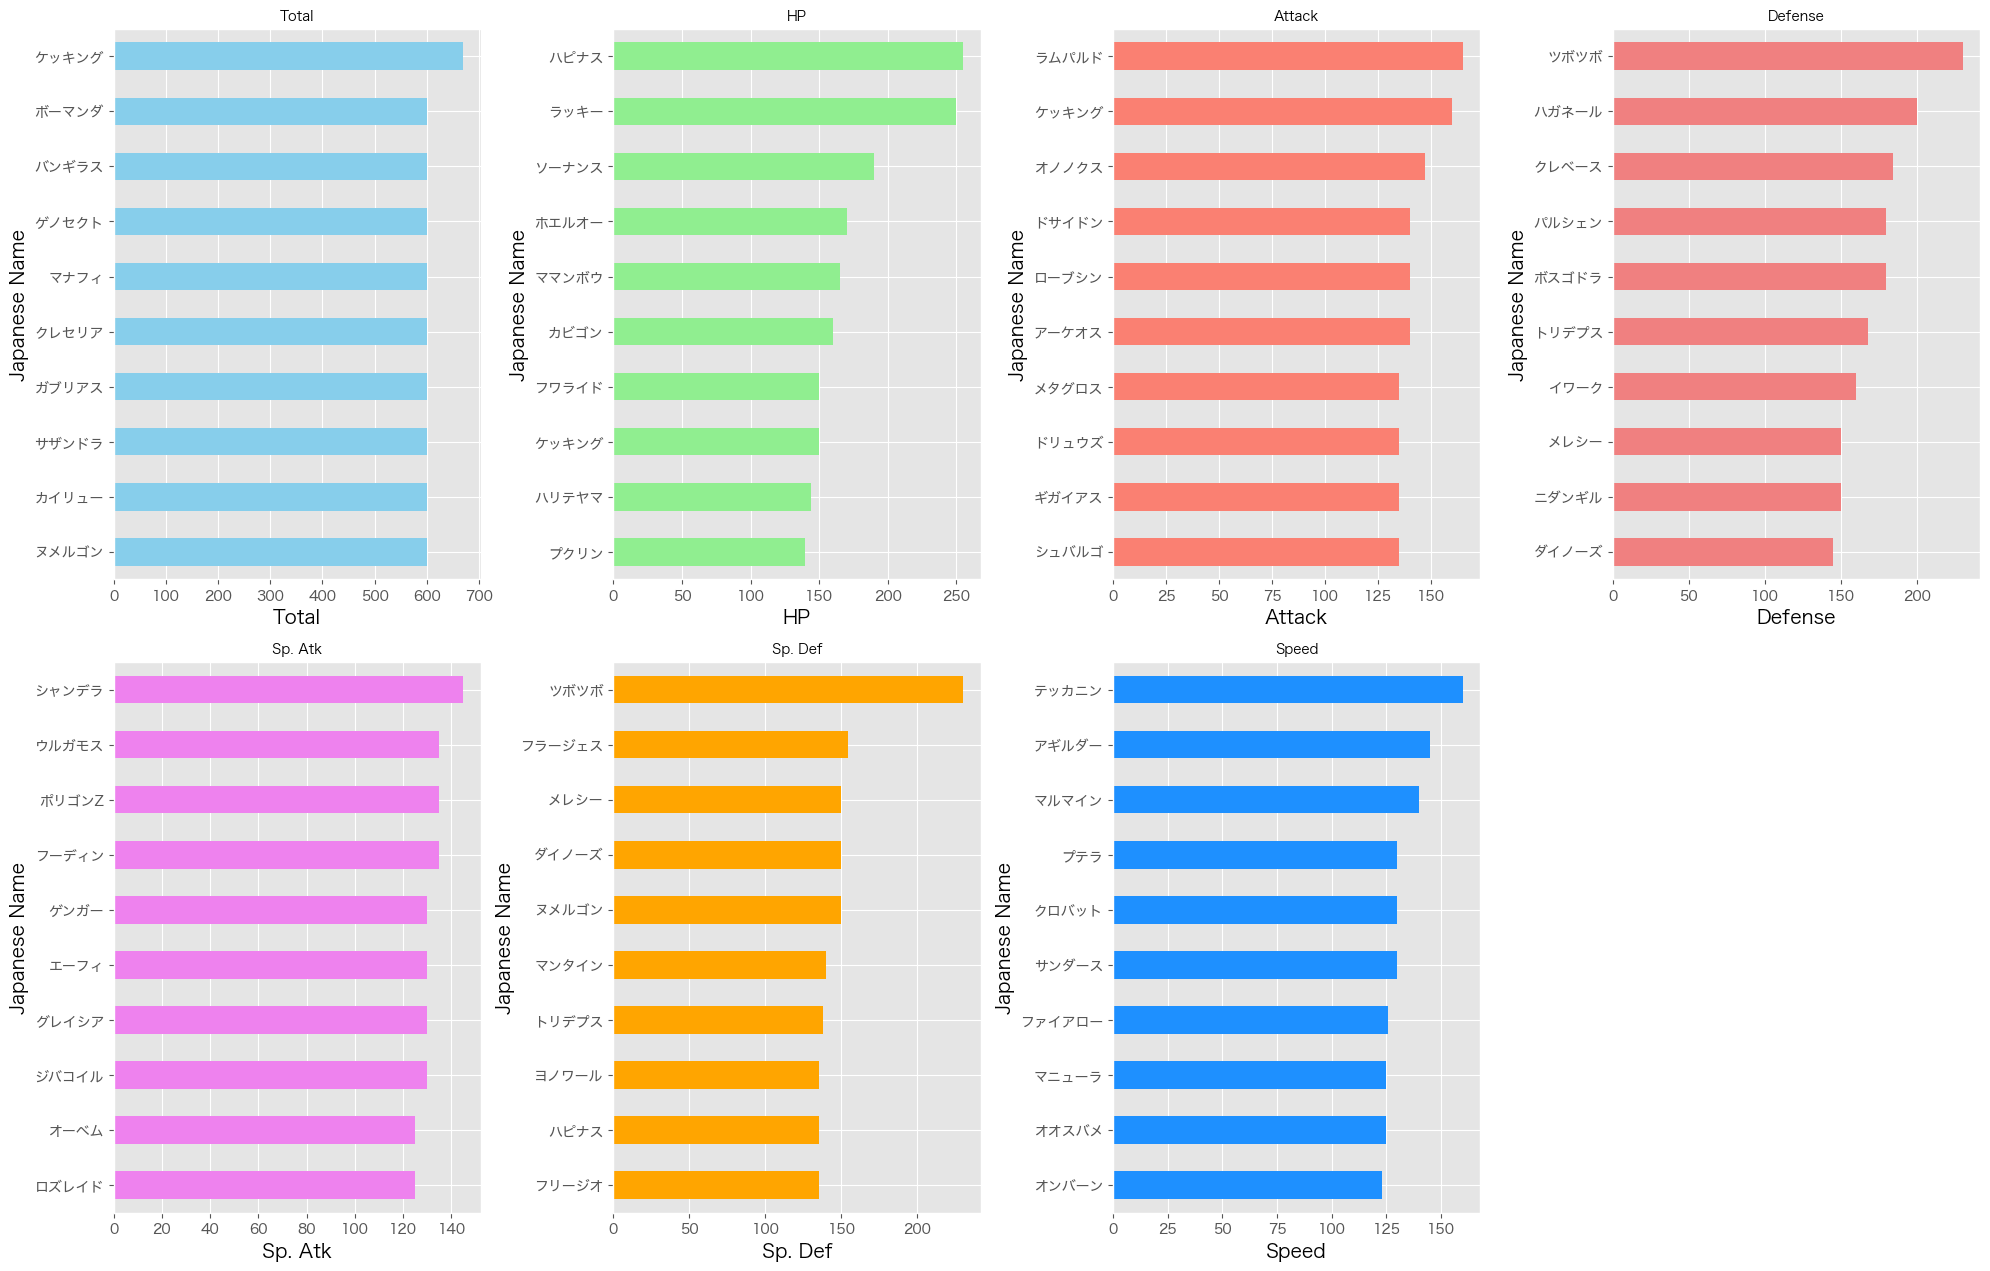

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 日本語フォントを設定
font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc'  # MacのHiraginoフォントの例
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 伝説のポケモンを除外
non_legendary = train2[train2["Legendary"] == False]

# グラフの全体サイズを設定
plt.figure(figsize=(20, 25))

# Totalの分布
plt.subplot(4, 4, 1)
non_legendary.sort_values(by="Total", ascending=False).head(10).set_index("Japanese_Name")["Total"].sort_values().plot(kind="barh", color='skyblue')
plt.title("Total", fontsize=16, fontproperties=font_prop)
plt.xlabel("Total", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# HPの分布
plt.subplot(4, 4, 2)
non_legendary.sort_values(by="HP", ascending=False).head(10).set_index("Japanese_Name")["HP"].sort_values().plot(kind="barh", color='lightgreen')
plt.title("HP", fontsize=16, fontproperties=font_prop)
plt.xlabel("HP", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Attackの分布
plt.subplot(4, 4, 3)
non_legendary.sort_values(by="Attack", ascending=False).head(10).set_index("Japanese_Name")["Attack"].sort_values().plot(kind="barh", color='salmon')
plt.title("Attack", fontsize=16, fontproperties=font_prop)
plt.xlabel("Attack", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Defenseの分布
plt.subplot(4, 4, 4)
non_legendary.sort_values(by="Defense", ascending=False).head(10).set_index("Japanese_Name")["Defense"].sort_values().plot(kind="barh", color='lightcoral')
plt.title("Defense", fontsize=16, fontproperties=font_prop)
plt.xlabel("Defense", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Sp. Atkの分布
plt.subplot(4, 4, 5)
non_legendary.sort_values(by="Sp. Atk", ascending=False).head(10).set_index("Japanese_Name")["Sp. Atk"].sort_values().plot(kind="barh", color='violet')
plt.title("Sp. Atk", fontsize=16, fontproperties=font_prop)
plt.xlabel("Sp. Atk", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Sp. Defの分布
plt.subplot(4, 4, 6)
non_legendary.sort_values(by="Sp. Def", ascending=False).head(10).set_index("Japanese_Name")["Sp. Def"].sort_values().plot(kind="barh", color='orange')
plt.title("Sp. Def", fontsize=16, fontproperties=font_prop)
plt.xlabel("Sp. Def", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# Speedの分布
plt.subplot(4, 4, 7)
non_legendary.sort_values(by="Speed", ascending=False).head(10).set_index("Japanese_Name")["Speed"].sort_values().plot(kind="barh", color='dodgerblue')
plt.title("Speed", fontsize=16, fontproperties=font_prop)
plt.xlabel("Speed", fontsize=14, fontproperties=font_prop)
plt.ylabel("Japanese Name", fontsize=14, fontproperties=font_prop)

# レイアウトの調整
plt.tight_layout()
plt.show()

- ケッキングが強い

<img src="king.jpeg" alt="ポケモンの画像" width="250" height="250">

### 最強ポケモンランキング（伝説以外）

In [121]:
# exclude legendary
name_list = []
for i in train2["Type 1"].unique():
    name_list.append(train2[(train2["Type 1"] == i) & (train2["Legendary"] == 0)].sort_values(by="Total", ascending=False).iloc[0, :]["Name"])

train2[train2["Name"].isin(name_list)].sort_values(by="Total", ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Japanese_Name
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False,ケッキング
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False,バンギラス
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False,メタグロス
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False,ヌメルゴン
717,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False,ゲノセクト
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False,サザンドラ
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False,クレセリア
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False,マナフィ
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False,ウインディ
739,671,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False,フラージェス


### クラスタリング

![Sample Image](clustering1.png)

![Sample Image](shuhou.png)

### 今回はk-means法でグルーピングしてみる

In [122]:
# train2データフレームから指定した列を抽出
# iloc[]メソッドは行と列の位置を使ってデータを抽出する
# iloc[:, 5:11]は全ての行（:）と、5番目から10番目の列（5から11までのスライス）を選択する
# ilocは位置ベースのインデックスを使用するので、範囲は0から始まり、終了位置は含まない
# つまり、5, 6, 7, 8, 9, 10列が選択される
x = train2.iloc[:, 5:11]

In [123]:
# StandardScalerはデータの標準化（平均を0、標準偏差を1に）を行うためのクラス
from sklearn.preprocessing import StandardScaler

# StandardScalerオブジェクトを作成
# このオブジェクトはfit()メソッドとtransform()メソッドを持ち、データの標準化を行う
scaler = StandardScaler()

# fit_transform()メソッドを使って、データxを標準化
# fit()メソッドでデータxの平均と標準偏差を計算し、transform()メソッドでその計算結果を用いてデータを変換（標準化）
x_std = scaler.fit_transform(x)

### エルボー法でクラスタ数を設定する

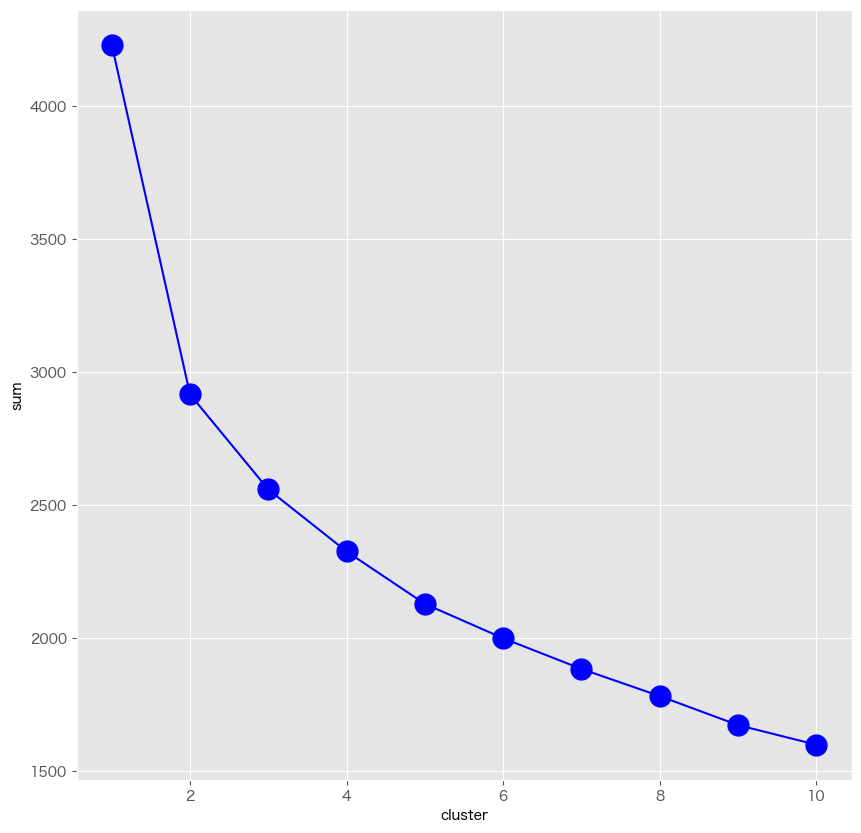

In [124]:
# KMeansクラスタリングをインポート
from sklearn.cluster import KMeans

# クラスタリングの各クラスタ数に対する総距離を格納するためのリストを初期化
sum = []

# 1から10までの異なるクラスタ数に対してKMeansクラスタリングを適用
for i in range(1, 11):
    # n_clusters=iでクラスタ数を設定してKMeansオブジェクトを作成
    km = KMeans(n_clusters=i)
    # 標準化されたデータx_stdに対してKMeansクラスタリングを適用して学習
    km.fit(x_std)
    # km.inertia_は各クラスタの重心から各点への距離の総和を示す
    # これをリストsumに追加
    sum.append(km.inertia_)

# グラフのサイズを指定
plt.figure(figsize=(10, 10))
# クラスタ数に対する総距離のプロットを作成
plt.plot(range(1, 11), sum, marker='o', color="blue", ms=15)
# x軸のラベルを設定
plt.xlabel("cluster")
# y軸のラベルを設定
plt.ylabel("sum")
# グラフを表示
plt.show()

In [125]:
# KMeansクラスタリングオブジェクトを作成し、クラスタ数を5に設定
# その後、標準化されたデータx_stdに対してKMeansクラスタリングを適用
k_means = KMeans(n_clusters=5).fit(x_std)

In [126]:
# k_meansオブジェクトのlabels_属性を参照
# この属性は、各データポイントがどのクラスタに割り当てられたかを示すラベルを含む配列
# クラスタリング後にデータポイントのクラスタラベルを確認するために使用
k_means.labels_

array([4, 3, 1, 4, 3, 1, 4, 3, 1, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 2, 4, 4, 0, 4, 4, 3, 4, 0, 4, 3, 4, 0, 4, 3, 4, 4,
       1, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 0, 4, 3, 3, 4,
       0, 0, 4, 3, 3, 4, 3, 4, 2, 2, 3, 3, 4, 0, 4, 3, 4, 4, 3, 4, 0, 4,
       0, 4, 2, 4, 3, 3, 2, 4, 0, 4, 2, 4, 3, 4, 1, 4, 2, 3, 2, 0, 4, 2,
       4, 0, 0, 2, 0, 4, 3, 4, 0, 4, 3, 3, 3, 3, 3, 3, 2, 3, 4, 0, 0, 4,
       4, 0, 3, 1, 4, 4, 2, 4, 2, 3, 0, 1, 1, 1, 4, 3, 1, 1, 1, 4, 3, 1,
       4, 3, 1, 4, 3, 1, 4, 3, 4, 0, 4, 3, 4, 0, 3, 4, 0, 4, 4, 4, 4, 2,
       4, 3, 4, 4, 1, 2, 4, 0, 2, 1, 4, 4, 3, 4, 4, 0, 3, 4, 0, 1, 2, 3,
       0, 3, 4, 0, 3, 4, 2, 0, 2, 2, 4, 0, 3, 2, 2, 0, 3, 4, 0, 4, 2, 4,
       0, 2, 4, 0, 4, 3, 2, 4, 3, 1, 4, 2, 1, 3, 4, 4, 2, 4, 3, 3, 3, 0,
       1, 1, 1, 4, 0, 1, 1, 1, 1, 4, 3, 3, 4, 3, 1, 4, 0, 0, 4, 3, 4, 3,
       4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 2, 4, 4, 1, 4, 3, 4, 3,
       4, 3, 1, 4, 3, 4, 4, 4, 0, 4, 0, 4, 2, 4, 4,

In [127]:
# x_stdの各要素を小数点以下2桁に四捨五入
# np.round()関数を使用して、配列またはデータフレームの各要素を指定した小数点以下の桁数に四捨五入
x_std = np.round(x_std, 2)

# 四捨五入されたx_stdを表示
x_std

array([[-0.89, -0.89, -0.73, -0.11, -0.14, -0.75],
       [-0.31, -0.44, -0.25,  0.42,  0.42, -0.19],
       [ 0.46,  0.26,  0.43,  1.13,  1.16,  0.55],
       ...,
       [ 2.25,  1.96,  0.84,  2.23,  1.09,  1.25],
       [-0.7 ,  0.89,  2.72,  1.13,  3.03, -0.56],
       [ 0.46,  1.23,  1.69,  2.2 ,  0.79,  0.18]])

In [128]:
# x_stdをpandasのデータフレームに変換
# np.round()で四捨五入されたデータを含む配列x_stdをpandasのDataFrameに変換
x_std = pd.DataFrame(x_std)

# 元のデータフレームxの列名をx_stdに適用
# xの列名を取得し、それをx_stdデータフレームの列名として設定
x_std.columns = x.columns

# x_stdデータフレームの先頭5行を表示
# これにより、データの変換と列名の設定が正しく行われたかを確認
x_std.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.89,-0.89,-0.73,-0.11,-0.14,-0.75
1,-0.31,-0.44,-0.25,0.42,0.42,-0.19
2,0.46,0.26,0.43,1.13,1.16,0.55
3,-1.13,-0.78,-0.94,-0.29,-0.70,-0.01
4,-0.39,-0.37,-0.43,0.42,-0.14,0.55


In [129]:
# KMeansクラスタリングの結果として得られたクラスタラベルを、x_stdデータフレームの新しい列として追加
# k_means.labels_は各データポイントのクラスタラベルを含む配列
# これをx_stdデータフレームの"labels"という新しい列に格納することで、各データポイントに対応するクラスタラベルをデータフレームに含める
x_std["labels"] = k_means.labels_


In [130]:
# train2 データフレームのインデックスをリセット
train2_reset = train2.reset_index(drop=True)

# x_std データフレームのインデックスをリセット
x_std_reset = x_std.reset_index(drop=True)

# "Japanese_Name" 列と標準化されたデータを含む x_std データフレームを結合
pkresults = pd.concat([train2_reset["Japanese_Name"], x_std_reset], axis=1)

# クラスタラベル列の名前を "labels" と仮定
cluster_label_column = "labels"  # 実際のクラスタラベルの列名に置き換えてください

# クラスタラベル列でデータフレームを並び替え
pkresults_sorted = pkresults.sort_values(by=cluster_label_column)

# すべての列を表示する設定
#pd.set_option('display.max_columns', None)

# すべての行を表示する設定
#pd.set_option('display.max_rows', None)

# データフレームの全体を表示するために省略をオフにする設定
#pd.set_option('display.max_colwidth', None)

# 並び替えた結果のデータフレームを表示
pkresults_sorted

,Japanese_Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,labels
319,ホエルコ,2.41,-0.16,-1.21,0.07,-1.26,-0.19,0
548,ワルビアル,1.05,1.48,0.33,-0.11,0.04,0.99,0
194,ヌオー,1.05,0.36,0.50,-0.11,-0.14,-1.12,0
88,ベトベトン,1.44,1.06,0.16,-0.11,1.16,-0.56,0
447,カバルドン,1.55,1.30,1.63,-0.00,0.12,-0.67,0
...,...,...,...,...,...,...,...,...
301,ヤミラミ,-0.70,0.02,0.16,-0.11,-0.14,-0.56,4
300,エネコロロ,0.08,-0.33,-0.19,-0.46,-0.52,0.18,4
299,エネコ,-0.70,-1.03,-0.87,-1.17,-1.26,-0.56,4
354,ヨマワル,-1.87,-1.20,0.67,-1.35,0.79,-1.49,4


In [131]:
# pkresultsデータフレームから、クラスタラベルが0の行のみを抽出し、新しいデータフレームpk_0を作成
pk_0 = pkresults[pkresults["labels"] == 0]

# pkresultsデータフレームから、クラスタラベルが1の行のみを抽出し、新しいデータフレームpk_1を作成
pk_1 = pkresults[pkresults["labels"] == 1]

# pkresultsデータフレームから、クラスタラベルが2の行のみを抽出し、新しいデータフレームpk_2を作成
pk_2 = pkresults[pkresults["labels"] == 2]

# pkresultsデータフレームから、クラスタラベルが3の行のみを抽出し、新しいデータフレームpk_3を作成
pk_3 = pkresults[pkresults["labels"] == 3]

# pkresultsデータフレームから、クラスタラベルが4の行のみを抽出し、新しいデータフレームpk_4を作成
pk_4 = pkresults[pkresults["labels"] == 4]


### 0クラス　HP高いグループ
- ハピナス・ラッキー・カビゴン・ホエルオー etc


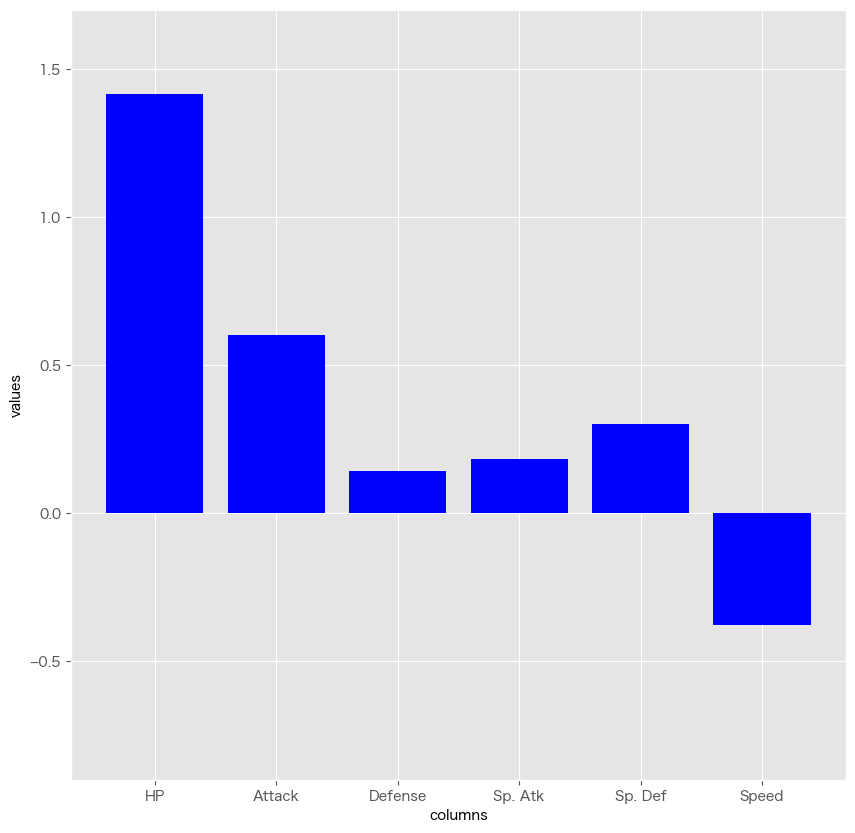

In [132]:
# グラフのサイズを指定して新しい図を作成
plt.figure(figsize=(10, 10))

# pk_0データフレームの特定の列の平均値を棒グラフでプロット
# pk_0.iloc[:, 1:7]で2列目から7列目（1列目は含まず）のデータを選択
# .columnsで選択された列の名前を取得
# .mean()で各列の平均値を計算
# plt.bar()で棒グラフを作成し、列名をx軸に、平均値をy軸に設定、色は青
plt.bar(pk_0.iloc[:, 1:7].columns, pk_0.iloc[:, 1:7].mean(), color="blue")

# y軸の範囲を指定
plt.ylim(-0.9, 1.7)

# x軸のラベルを設定
plt.xlabel("columns")

# y軸のラベルを設定
plt.ylabel("values")

# グラフを表示
plt.show()

### 1クラス　バランスよく強いグループ（伝説ポケモンはほぼここ）
- カイリュー・バンギラス・ケッキング・ウェンディ・トゲキッス・ジバコイル・ガブリアス　etc


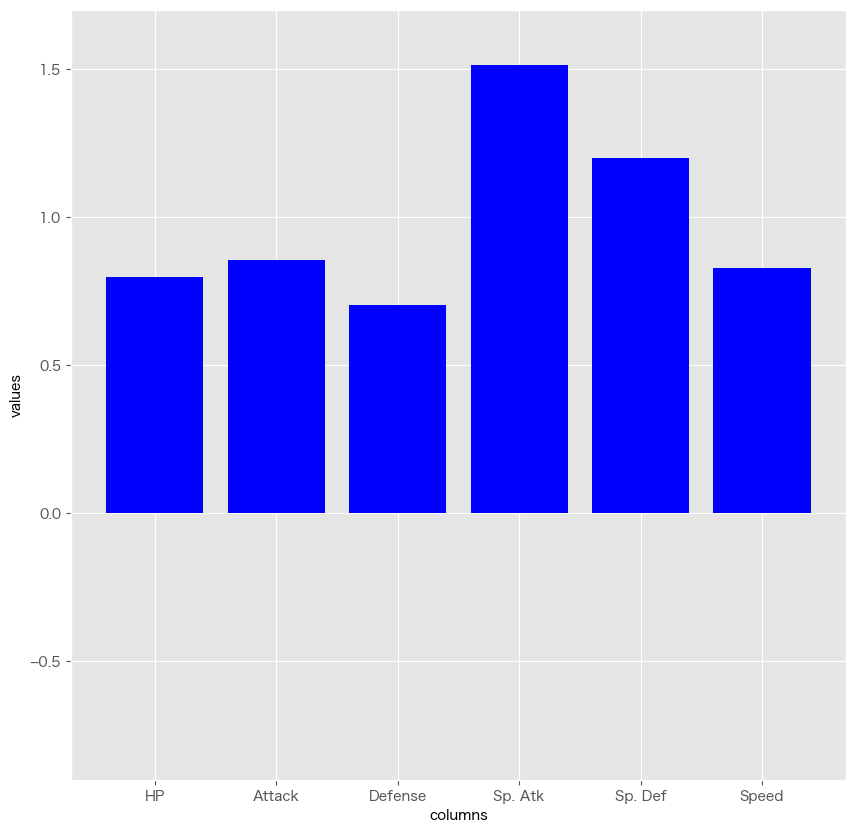

In [133]:
plt.figure(figsize=(10,10))
plt.bar(pk_1.iloc[:,1:7].columns,pk_1.iloc[:,1:7].mean(),color="blue")
plt.ylim(-0.9,1.7)
plt.xlabel("columns")
plt.ylabel("values")
plt.show()

### 2クラス　防御力高いがおっそいグループ
- ハガネール・クレベース・ツボツボ・レジロック・パルシェン etc

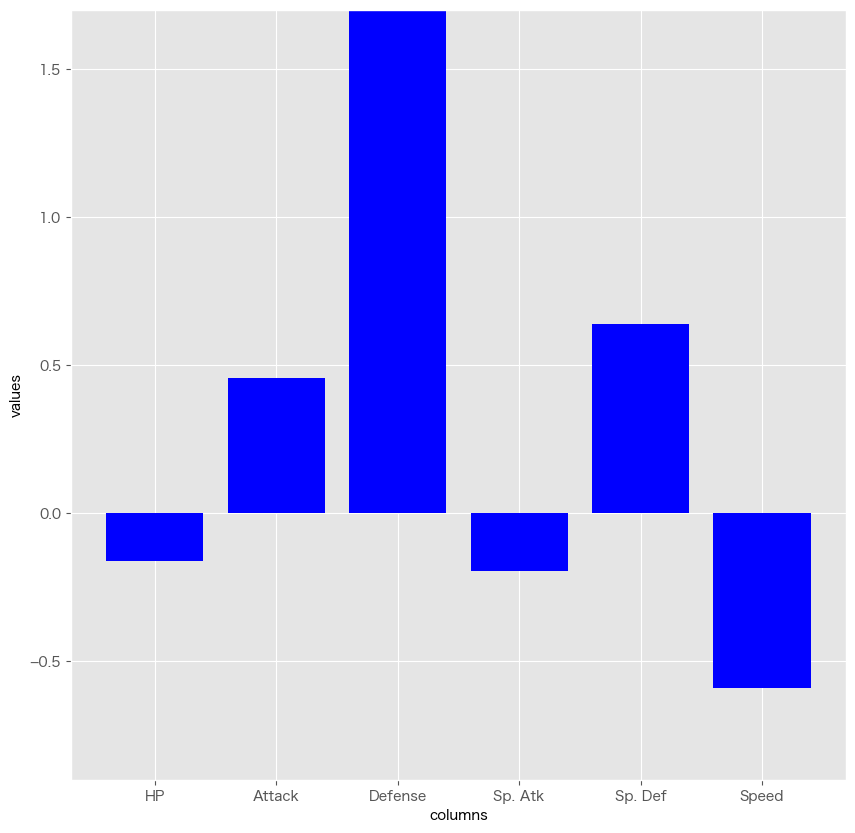

In [134]:
plt.figure(figsize=(10,10))
plt.bar(pk_2.iloc[:,1:7].columns,pk_2.iloc[:,1:7].mean(),color="blue")
plt.ylim(-0.9,1.7)
plt.xlabel("columns")
plt.ylabel("values")
plt.show()

### 3クラス　スピード早く、特攻で攻撃グループ
- マルマイン・サンダース・クロバット・ジュカイン・ゲッコウガ・フーディン・ファイアロー・オンバーン・アギルダー etc

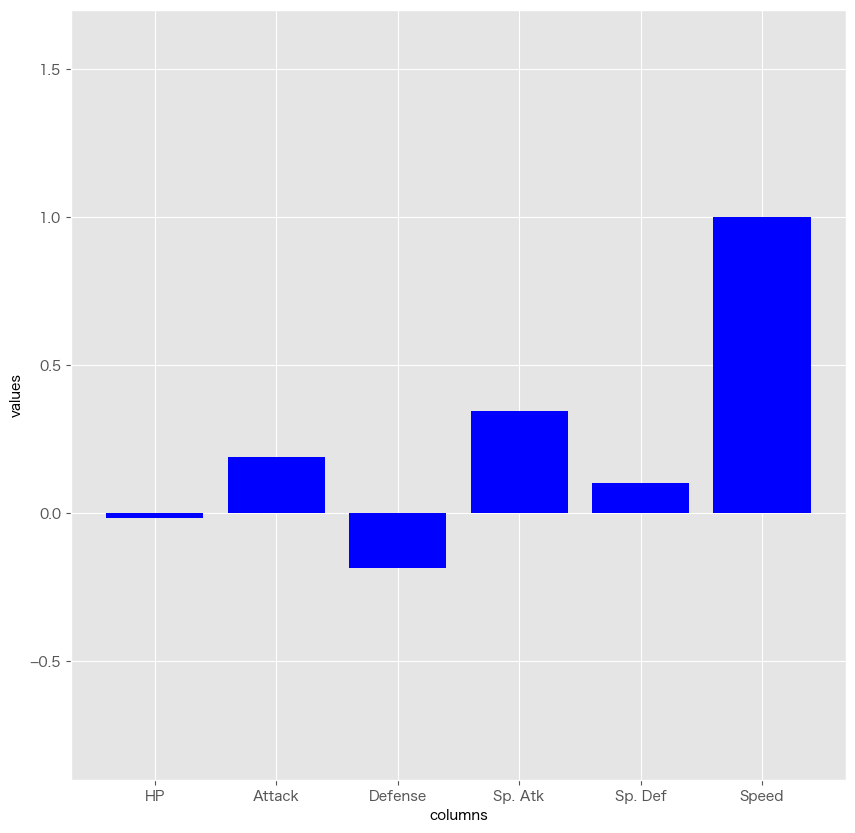

In [135]:
plt.figure(figsize=(10,10))
plt.bar(pk_3.iloc[:,1:7].columns,pk_3.iloc[:,1:7].mean(),color="blue")
plt.ylim(-0.9,1.7)
plt.xlabel("columns")
plt.ylabel("values")
plt.show()

### 4クラス　弱いYOWAIグループ
- ピチュー・ピィ・ヒメグマ・キャタピー・ポッチャマ・マンキー　etc



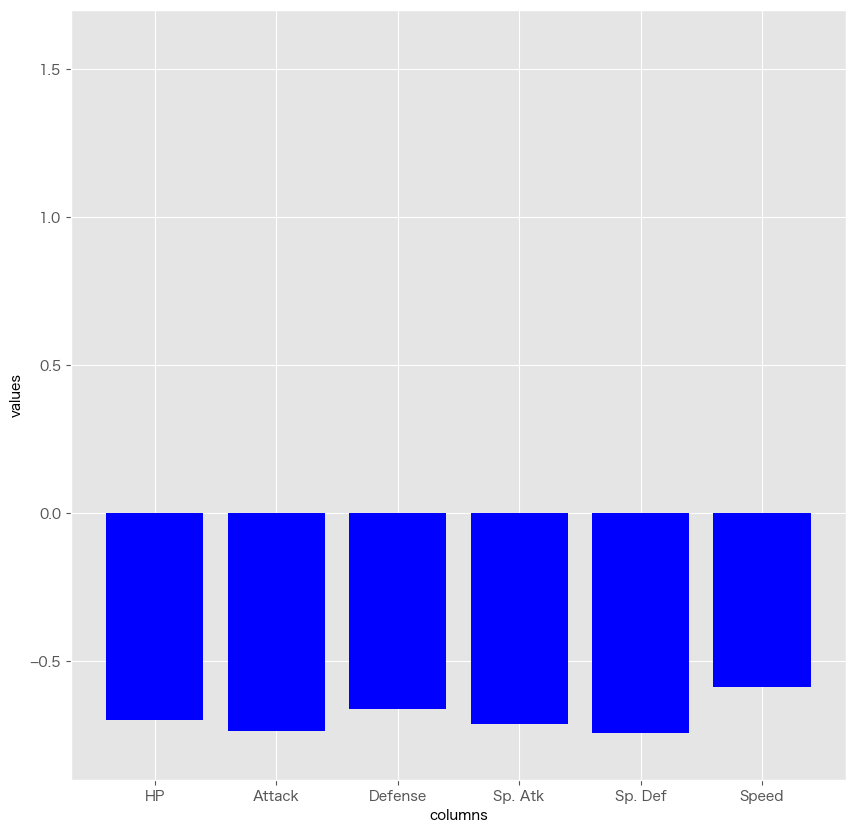

In [136]:
plt.figure(figsize=(10,10))
plt.bar(pk_4.iloc[:,1:7].columns,pk_4.iloc[:,1:7].mean(),color="blue")
plt.ylim(-0.9,1.7)
plt.xlabel("columns")
plt.ylabel("values")
plt.show()

![Sample Image](image.png)